Name: __________________        Class: __________________     Date: __________________

<center>
    <img width="100%" src="https://raw.githubusercontent.com/astroDimitrios/Astronomy/main/APBanner.png" alt='A&P Logo'>
</center>

# Earth's Heat

### AIM - Explore the Earth's thermal gradient, describe how heat is transferred and where it's from, perform simple thermal calculations
Difficulty: Medium

**Predict**

Have a think about these questions and make some predictions! Be sure to tell someone else what you predict.

1) How hot is the Earth's interior?  
2) Where does this thermal energy come from?  
3) How does the heat get transferred throughout the Earth?  

**Enter your predictions:**    
1)    
2)    
3)    

## Contents

* [Start](#Start)
* [Transferring Heat](#TH)
* [Question Answers](#Answers)
* [Challenges](#Challenges)
* [References](#References)

# Let's go: The Geotherm <a class="anchor" id="Start"></a>

The geotherm or geothermal gradient is the temperature of the Earth vs depth. In this notebook you will approximate the lithosphere's geothermal gradient numerically and plot the entire gradient with data stored in **geotherm.csv**. Finally you'll perform simple thermal calculations related to heat transfer.

You can calculate the geothermal gradient for the listhosphere using the following equations:

$$T(z)=Qz/K +A_0z(b-z/2)/K+T_s,\ \ \ \ z<b$$

$$T(z)=Qz/K+A_0b^2/(2K)+T_s,\ \ \ \ b\leq z\leq L \ \ where\ \ L=100\ km$$

- $T_s$ is the surface temperature in degrees Celcius
- $Q$ is the mantle heat flow ($mW/m^2$)
- $K$ is the thermal conductivity ($W/m/^{\circ}$)
- $A_0=\rho H_s$ is the heat production ($\mu W/m^3$)
- $b$ the characteristic depth of $A_0$ ($km$)
- and $z$ the depth in $km$.

Typical values are given in the code block below. 
<div class="alert alert-block alert-success">
Use these equations to complete the code below and plot the geotherm for the lithosphere:
    </div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from IPython.display import Image

(0.0, 800.0)

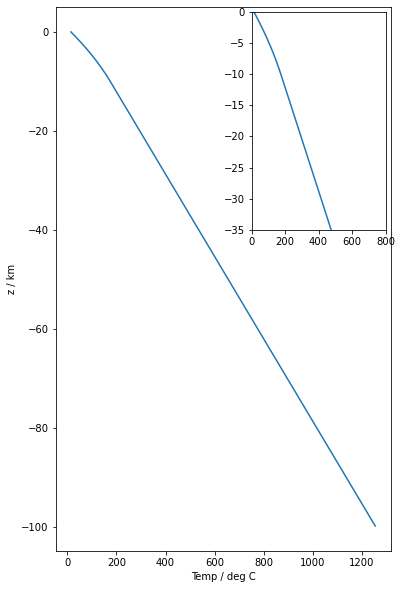

In [2]:
# Typical values
Ts = 15  # surface temp (deg C)
Q = 30   # mantle heat flow (mW/m^2)
K = 2.5  # thermal conductivity (W/m/deg)
Ao = 2.0 # heat production (microW/m^3)
b = 10   # characteristic depth of Ao (km)

# Your code here:
z = np.arange(0,100,.1)
T = []

for i in z:
    if i < b:
        T.append(Q*i/K + Ao*i*(b-i/2)/K + Ts)
    else:
        T.append(Q*i/K + Ao*b**2/(2*K) + Ts)

fig = plt.figure(num=1, figsize=(9, 15))
plt.plot(T, -z)
plt.xlabel('Temp / deg C')
plt.ylabel('z / km')

# plot an inset axis showing only the first 35 km
axins = inset_axes(plt.gca(), width="40%", height="40%")
axins.plot(T, -z)
axins.set_ylim(-35, 0)
axins.set_xlim(0, 800)

You should see two gradients/sections to your plot, one above $b$ and one below $b$. 

Try answering the following questions:
<div class="alert alert-block alert-info">

1) Change $b$, what effect does it have?

2) By changing some of the model parameters get a temperature of $700^{\circ}C$ at $35\ km$. Is there only one way of doing it? Which parameters do you think we know best?

3) These equations assume that the heat flow is by conduction only? Is that a valid assumption and why?
    
</div>

**Enter your answers:**    
1)    
2)    
3)

So you have time to think I have placed some answers/thoughts to these questions at the end of the notebook just before the challenges section.

Let's now take a look at the geotherm for all the layers of the Earth.
<div class="alert alert-block alert-success">
Complete the code blocks below to load in the data and plot depth versus temperature:
</div>

In [3]:
# Your code here:
file = 'geotherm.csv'
df = pd.read_csv(file)
df.head()

,r,r*,T
0,0.0,6371.0,5301.0
1,200.0,6171.0,5269.0
2,400.0,5971.0,5237.0
3,600.0,5771.0,5214.0
4,800.0,5571.0,5191.0


Notice we have no $z$ column and here $T$ is in Kelvin!
<div class="alert alert-block alert-success">
In the next cell do the following:

- Add a new column of $z$ values by taking the radius of Earth ($\approx6371\ km$) away from $r$
- Add a new ```Tdeg``` column by converting $T$ in Kelvin to degrees Celcius ($273.15\ K = 0\ ^{\circ}C$)
    </div>

In [4]:
# Your code here:
df['z'] = df['r']-6371
df['Tdeg'] = df['T']-273.15
df.head()

,r,r*,T,z,Tdeg
0,0.0,6371.0,5301.0,-6371.0,5027.85
1,200.0,6171.0,5269.0,-6171.0,4995.85
2,400.0,5971.0,5237.0,-5971.0,4963.85
3,600.0,5771.0,5214.0,-5771.0,4940.85
4,800.0,5571.0,5191.0,-5571.0,4917.85


<div class="alert alert-block alert-success">
Now plot ```Tdeg``` vs ```z```:
</div>

Text(0.5, 0, 'Temp / deg C')

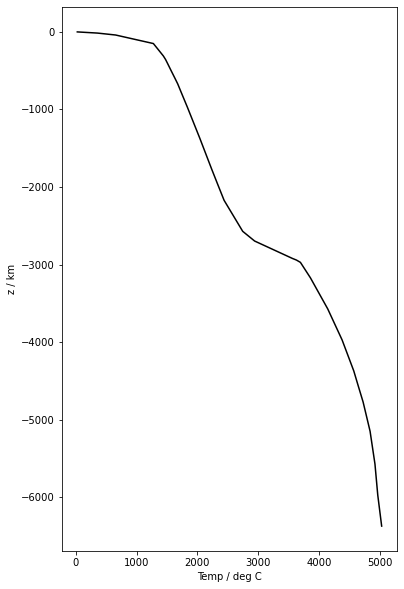

In [5]:
# Your code here:
fig2 = plt.figure(num=2, figsize=(12, 15))
ax = plt.subplot(111)
ax.plot(df['Tdeg'], df['z'], zorder=2, color='k')
ax.set_ylabel('z / km')
ax.set_xlabel('Temp / deg C')

Take a few minutes to tidy up your plots as you see fit and save them: 

In [6]:
# Make any cosmetic changes to your plots you think is necessary and then save them
# Your code here:


What temperature does the Earth's core reach? Where are there big changes in the geotherm?

To help us answer those questions let's load this figure made with **thermal.py**:

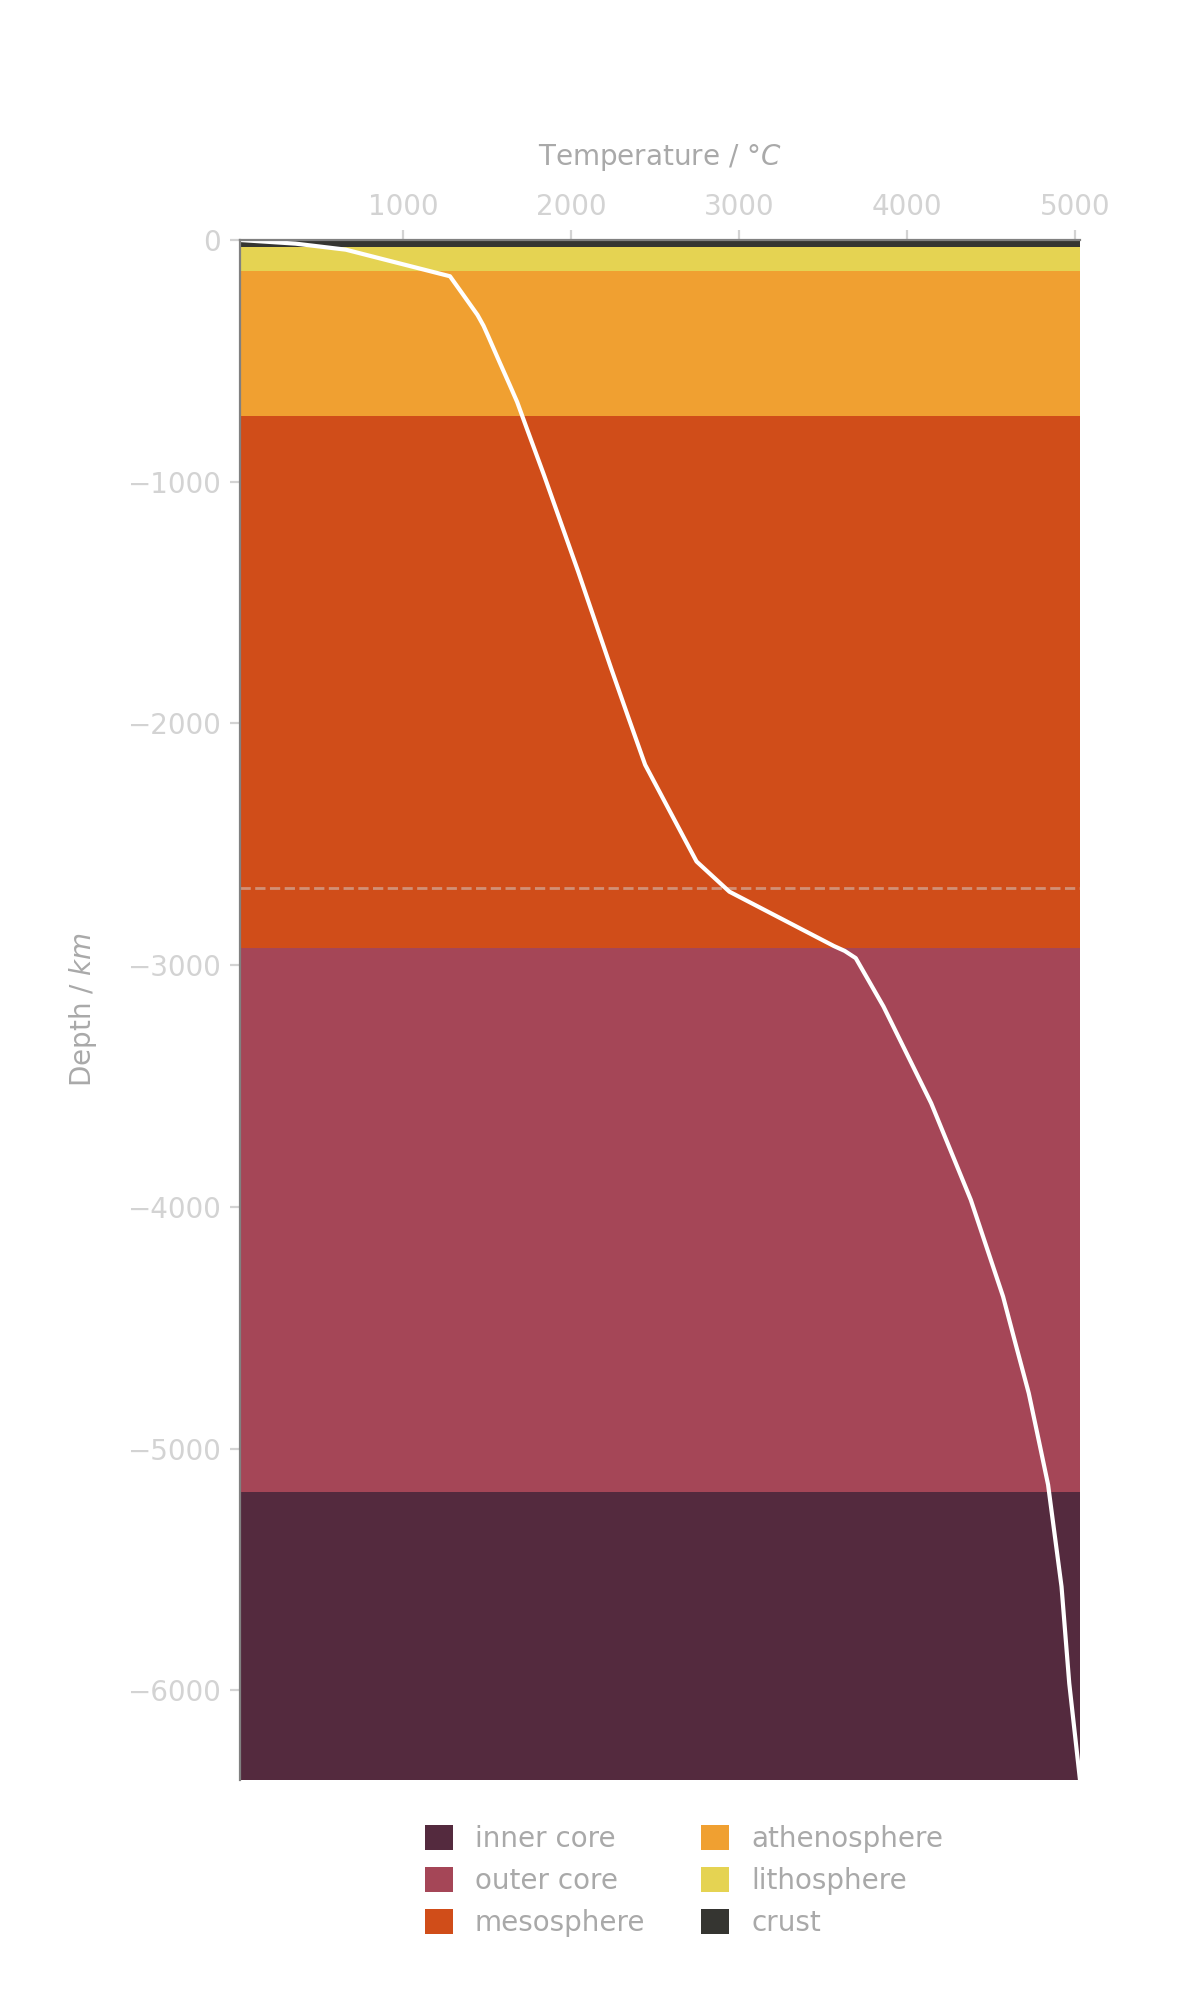

In [7]:
Image('geotherm.png')

Notice how there appear to be significant changes at the lithosphere-athenosphere boundary and at the core-mantle boundary. You might now be asking yourself if the interior is so hot how come only the outer core is liquid? Although the temperature is increasing so does the pressure! This increase in pressure keeps the material solid until the inner core where the temp increase is enough to melt the material despite the high pressure. There is pressure data alongside the original temperature data in **geotherm_original.csv** which you can plot if you're curious.

## Transferring Heat <a class="anchor" id="TH"></a>

We know that there are three ways of transferring heat. Conduction, convection, and radiation. Conduction occurs throughout the solid layers of the Earth and convection occurs in the outer core and the mantle.

### Conduction

Conduction is the transfer of thermal energy between solids. You can work out the heat (energy transferred) using the equation:

$$Q=mc\Delta T$$

where $Q$ is the heat in $J$, $m$ is the mass of the material in $kg$, $c$ is the thermal heat capacity of the material (the energy needed to raise the temperature of one kilogram of the material by one degree) in $J/kg/K$, and $\Delta T$ is the change in temperature.
<div class="alert alert-block alert-success">
Use this equation to:

- Calculate the energy needed to raise $1\ kg$ of mantle material from the temperature at the top of the mantle to the temperature at the bottom of the mantle (assume const P and no phase changes occur)
- Compare the value to the energy needed to boil the same mass of water
</div>
Useful values are given in the code block below:

In [8]:
# water 4180 J/kg/K
# iron 447
# olivine 815
# mantle 1260
# rock typical 700
# periclase (MgO) 924

# Energy needed to raise 1 kg of mantle material from temp top mantle to temp bottom
# (assume const P and no phase change)
# you will have to hover over your graph to get the temp change
# Your code here:
E = 1*1260*2000/10**6        # MJ
print(f"Energy to raise 1 kg of mantle material from mantle bottom temp to top temp = {E:.2f} MJ")

# Compare to the energy needed to boil water from room temp (1kg)
# Your code here:
Ew = 1*4180*100/10**6       # MJ
print(f"Energy to boil 1kg of water from room temp = {Ew:.2f} MJ")

Energy to raise 1 kg of mantle material from mantle bottom temp to top temp = 2.52 MJ
Energy to boil 1kg of water from room temp = 0.42 MJ


<br> Notice how water has such a high heat capacity! You need $0.418\ MJ$ of energy to make around five cups of tea. <br>


### Thermal Conductivity


<br>
Another useful property to consider is a materials thermal conductivity or how easily heat flows through the material. We can calculate it with the equation: 

$$Q=k\frac{\delta T}{\delta z}$$

- $Q$ this time is the rate of heat transfer in $W/m^2$
- $k$ is the thermal conductivity in $W/mK$
- $\frac{\delta T}{\delta z}$ is the change in temperature over the change in depth (which is the geothermal gradient between two points).


Some vales of $k$ are provided in the code block below. 
<div class="alert alert-block alert-success">
Use these values to:

- Calculate the rate of heat transfer in the upper mantle 
- Calcualte the rate of heat transfer in the lower mantle
- Compare the two values
</div>

In [9]:
# diamond 1600 W/mK
# sed rock 1.2 - 4.2
# granite 2.4 - 3.8
# basalt 1.3 - 2.9
# upper mantle 6.7
# lower mantle 20

# Calc therm gradient in upper mantle (take gradient in athenosphere)
# Then calc the thermal conductivity 
# Do same for lower mantle (mesosphere) and compare
# again you will need to hover over your figure you made earlier to read off T and z values
# Your code here:
ThermC_Upper = 6.7*(1600-1300)/(750000-110000) # W/m^2

print(f"Athesnosphere thermal gradient = {ThermC_Upper:.5f} W/m^2")

ThermC_Lower = 20*(2500-1600)/(2700000-750000)

print(f"Mesosphere thermal gradient = {ThermC_Lower:.5f} W/m^2")

Athesnosphere thermal gradient = 0.00314 W/m^2
Mesosphere thermal gradient = 0.00923 W/m^2


<br>Here the rate of heat transfer in the lower mantle is three times that of the upper mantle. Take this result with a pinch of salt though. There are large uncertainties to the temperatures within the Earth and taking the gradient from your graph would have been hard because the geotherm is not a straight line. Particularly towards the bottom of the lower mantle/mesosphere where you enter the D" region which is shown as a dashed grey line in the figure we loaded.

<br>

### Advection and Latent Heat

When advection occurs the molten rock will eventualy cool and form a solid. This phase change can release energy to the surroundings heating it up. We can calculate the heat transferred using this equation:

$$Q = mL$$

- $Q$ is heat like in our conduction equation
- $m$ the mass
- $L$ the latent heat

There are two types of latent heat. The latent heat of fusion, $L_f$, (liquid to solid) and the latent heat of vaporisation, $L_v$, (solid to gas). Of course $L_f$ is also used for calculations involving solids turning to liquids, ie it doesn't matter which way around the phase transition is happening.

Let's imagine $5 \ kg$ of lava in Hawaii solidifies to basalt as it cools. 
<div class="alert alert-block alert-success">
Calculate:

- How much energy is released when the Hawaiian lava solidifies using the equation above
- Then calculate the energy needed to melt $5 \ kg$ of iron at the core-mantle boundary
- Compare the two values
</div>

In [10]:
# Water to ice 335 kJ/kg
# Molten Fe to Solid Fe 275 kJ/kg
# Basalt (Hawaii) 400 kJ/kg

# Energy released when lava cools to basalt (5 kg volcanic bomb)
# Your code here:
E_lav_bas = 400*5/10**3 # J
print(f"Energy released when 5 kg of basalt solidifies = {E_lav_bas:.2f} J")

# Can you work out energy needed to melt Fe (5 kg) at the core mantle boundary?
# Your code here:
E_fe_melt = 275*5/10**3 # J
print(f"Energy required to melt 5 kg of Iron = {E_fe_melt:.2f} J")

Energy released when 5 kg of basalt solidifies = 2.00 J
Energy required to melt 5 kg of Iron = 1.38 J


<br>The $5 \ kg$ of lava solidifying releases more energy than is required to melt iron! Of course we are ignoring the massive pressure difference between these two scenarios. The energy released from our cooling lava will be much larger than we calculated since we ignored the cooling before and after the phase change.

### Convection

Convection cannot be easily described with simple equations like the ones above. Complex fluid equations often have to be solved numerically with special libraries dedicated to solving the equations, so we'll leave that for another time.

Check your answers below before attempting some of the Challenges or reading through the extra material in the References.<br><br>

<div class="alert alert-block alert-info">

## Answers <a class="anchor" id="Answers"></a>

1) Try changing $b$ what does it do? 

$b$ is the characteristic depth of radioactive elements in the crust which produce heat as they decay (this is in fact the primary heat source for the Earth, the other being heat left over from when the Earth formed). Radioactive elements such as thorium and uranium are lithophile elements which tend to move out of a partially molten mantle into the crust within igneous rocks.

Notice how increasing the depth at which we find these radioactive elements increases the temperature of the lithosphere.

2) By changing some of the model parameters get a temperature of $700^{\circ}C$ at $35\ km$. Is there one way of doing it? Which parameters do you think we know best?

Most crustal rocks will start melting at $700^{\circ}C$. The geothermal gradient is not uniform over the Earth at the same depth. The geotherm at the boundary of tectonic plates and the geotherm in the middle of a continent away from hot spots are going to be very different. A region of higher tectonic activity will have a quicker increase in temperature with depth.

You should have been able to get $700^{\circ}C$ a variety of ways. Increasing the mantle heat flow $Q$ for instance as if this point was at a region of tectonic activity or a hot spot. It is far easier to get accurate values for surface temperature and the thermal conductivity of the rock than it is the mantle heat flow.

3) These equations assume that the heat flow is by conduction only? Is that a valid assumption and why?

Yes! The lithosphere is rigid so heat flow is primarily via conduction. However in regions of higher tectonic activity or where island arcs are forming heat flow from advection needs to be considered. Advection is heat transfer from a moving body of fluid in this case magma. This magma can rise into the lithosphere and cool to become an intrusive igneous formation called a pluton. When it cools it transfers thermal energy to the surounding lithosphere.
    
</div>

# Challenge <a class="anchor" id="Challenges"></a>

1) Use structure.csv to recreate my figure of the geotherm that we loaded earlier (use structure.csv to plot the layers).  
2) Calculate the Rayleigh number for the mantle (and possibly the crust).  
3) Simulate conduction from the mantle to a rigid lithosphere using Newton's Law of Cooling (see an example with a teacup [here](http://greenteapress.com/modsimpy/ModSimPy3.pdf) - some beginning guidance is in **thermal.py**).

# References <a class="anchor" id="References"></a>

Cameron Davidson - Geothermal Gradients Activity [https://serc.carleton.edu/NAGTWorkshops/petrology/teaching_examples/24418.html](https://serc.carleton.edu/NAGTWorkshops/petrology/teaching_examples/24418.html)  
John Merck - Sources and movement of heat within planets [https://www.geol.umd.edu/~jmerck/geol212/lectures/10.html](https://www.geol.umd.edu/~jmerck/geol212/lectures/10.html)  
Marcus Bursik - The Earth's Heat and Temperature [http://www.glyfac.buffalo.edu/mib/class/325/Lecture/14/1401Thermal/thermal.html](http://www.glyfac.buffalo.edu/mib/class/325/Lecture/14/1401Thermal/thermal.html)  
Professor Bob Downs, University of Arizona, [https://www.geo.arizona.edu/xtal/geos306/fall06-10.htm](https://www.geo.arizona.edu/xtal/geos306/fall06-10.htm)  
Antoine Rozel - Thermal Structure of the Earth [http://jupiter.ethz.ch/~gfdteaching/dymali/2017/downloads/dymali-Lecture1-ThermalStructure.pdf](http://jupiter.ethz.ch/~gfdteaching/dymali/2017/downloads/dymali-Lecture1-ThermalStructure.pdf)

# Acknowledgements

Thanks to [Cameron Davidson](https://apps.carleton.edu/profiles/cdavidso/) for help understanding his geothermal gradients activity and answering all my questions.

## Sharing

If you share, use or modify this activity in any way use the citation in this [txt file](https://github.com/astroDimitrios/Astronomy/blob/master/CITATION.txt).    
Please contact me at astrodimitrios@gmail.com with any suggestions, mistakes found, or general questions about teaching astronomy with Python.

© Dimitrios Theodorakis GNU General Public License v3.0 https://github.com/astroDimitrios/Astronomy 